1.- Atenúa el ruido en la imagen ruido.jpg tal cual se ve en el ejemplo:

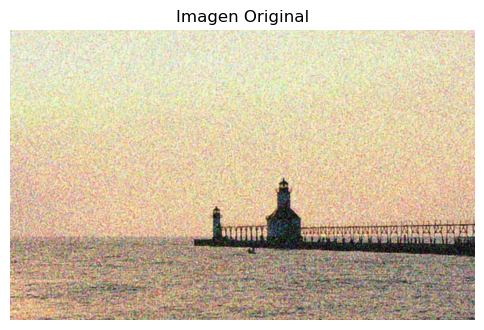

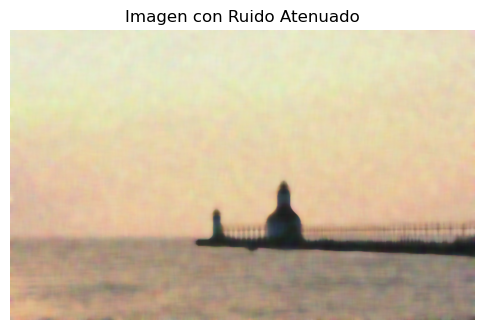

In [1]:
import cv2
import matplotlib.pyplot as plt
 
def mostrar_imagen(titulo, imagen):
    plt.figure(figsize=(6, 4))
    plt.title(titulo)
    plt.imshow(cv2.cvtColor(imagen, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()

ruido = cv2.imread('ruido.jpg')
 
ruido_suavizado = cv2.medianBlur(ruido, 15)
 
mostrar_imagen('Imagen Original', ruido)
mostrar_imagen('Imagen con Ruido Atenuado', ruido_suavizado)
 

2.- Usando la imagen “rosa.png” obtenga el siguiente resultado:

In [ ]:
import cv2
import numpy as np
 
imagen = cv2.imread('rosa.png')

hsv = cv2.cvtColor(imagen, cv2.COLOR_BGR2HSV)
 
rango_bajo1 = np.array([0, 100, 100])
rango_alto1 = np.array([10, 255, 255])
rango_bajo2 = np.array([160, 100, 100])
rango_alto2 = np.array([180, 255, 255])

mascara1 = cv2.inRange(hsv, rango_bajo1, rango_alto1)
mascara2 = cv2.inRange(hsv, rango_bajo2, rango_alto2)
mascara = cv2.bitwise_or(mascara1, mascara2)
 

desenfocada = cv2.GaussianBlur(imagen, (21, 21), 0)

resultado = np.where(mascara[:, :, None] == 255, imagen, desenfocada)
 
cv2.imshow("Rosa intacta - fondo borroso", resultado)
cv2.waitKey(0)
cv2.destroyAllWindows()

3.- Usando la imagen “Elementos jpg” obtenga el siguiente resultado.

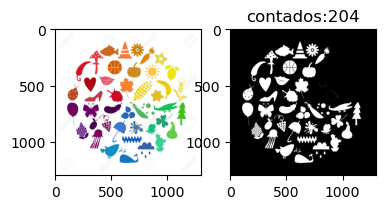

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage import measure

def conteo(img):
    img_gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    _,binaria=cv2.threshold(img_gray,178,255,cv2.THRESH_BINARY_INV)
    bordes,_=cv2.findContours(binaria,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
    cont=len(bordes)
    return cont,binaria
imagen=cv2.imread('elementos.jpg')

img_cont,bin=conteo(imagen)

plt.Figure(figsize=(10,5))
plt.subplot(231)
plt.imshow(cv2.cvtColor(imagen,cv2.COLOR_BGR2RGB))

plt.subplot(232)
plt.title(f'contados:{img_cont}')
plt.imshow(bin,cmap='gray')
plt.show()

4.- Usando la imagen Cristo obtiene el siguiente resultado (utiliza máscaras de
convolución)

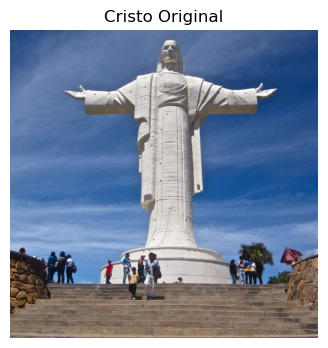

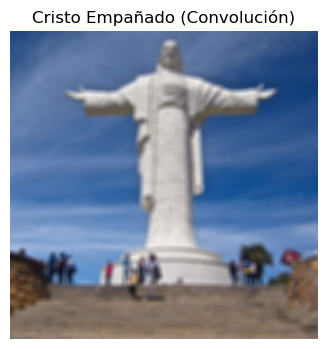

In [ ]:


import cv2
import matplotlib.pyplot as plt
cristo = cv2.imread('Cristo.jpg')
 

kernel = np.ones((15, 15), np.float32) / 225
cristo_empañado = cv2.filter2D(cristo, -1, kernel)
 
mostrar_imagen('Cristo Original', cristo)
mostrar_imagen('Cristo Empañado (Convolución)', cristo_empañado)
 

 

5.- Realiza una combinación de técnicas con una fotografía tuya (utiliza las técnicas de
bordes) explica las diferencias
Respuesta: 
Sobel: es más sensible al ruido, pero es útil para detectar contornos suaves.
Canny: combina reducción de ruido y doble umbral, da bordes más finos y definidos
 

6.- Realiza el código del lapaciano y lapaciano del gausiano mejorando los bordes
(deben verse más nítidos los bordes encontrados )

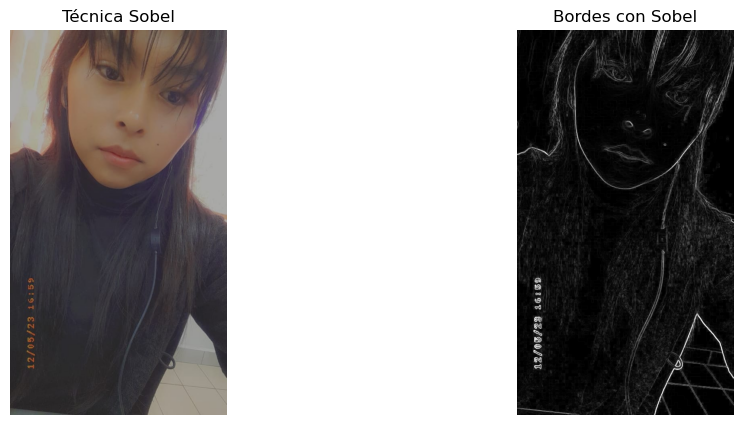

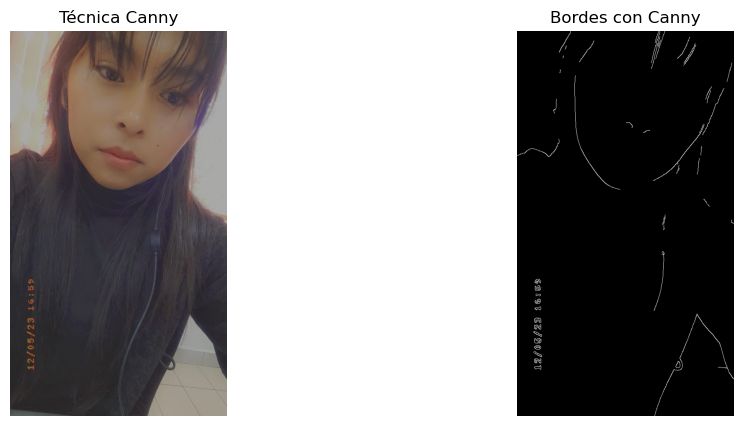

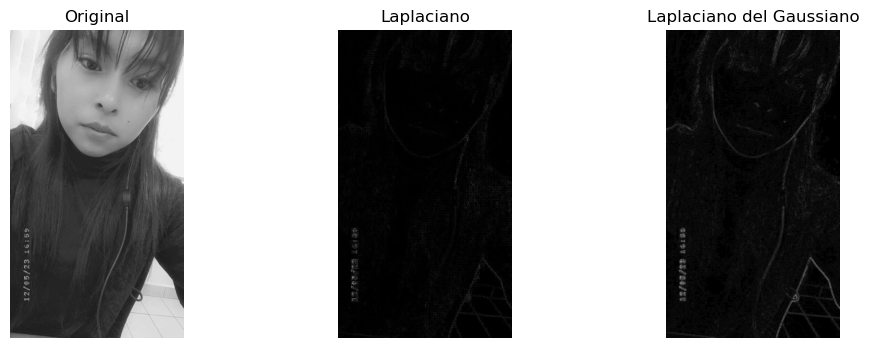

In [4]:
import cv2
import matplotlib.pyplot as plt
 
def mostrar_doble(titulo1, img1, titulo2, img2):
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.title(titulo1)
    plt.imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.subplot(1, 2, 2)
    plt.title(titulo2)
    plt.imshow(img2, cmap='gray')
    plt.axis('off')
    plt.show()
 
foto = cv2.imread('img1.jpeg')
gris = cv2.cvtColor(foto, cv2.COLOR_BGR2GRAY)
 
sobelx = cv2.Sobel(gris, cv2.CV_64F, 1, 0, ksize=3)
sobely = cv2.Sobel(gris, cv2.CV_64F, 0, 1, ksize=3)
sobel = cv2.magnitude(sobelx, sobely)
sobel = cv2.convertScaleAbs(sobel)
 
canny = cv2.Canny(gris, 100, 200)
 
mostrar_doble("Técnica Sobel", foto, "Bordes con Sobel", sobel)
mostrar_doble("Técnica Canny", foto, "Bordes con Canny", canny)
 
imagen = cv2.imread('img1.jpeg', 0)

laplaciano = cv2.Laplacian(imagen, cv2.CV_64F)
laplaciano = cv2.convertScaleAbs(laplaciano)
 

gauss = cv2.GaussianBlur(imagen, (5, 5), 0)
laplaciano_gauss = cv2.Laplacian(gauss, cv2.CV_64F)
laplaciano_gauss = cv2.convertScaleAbs(laplaciano_gauss)

plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.title("Original")
plt.imshow(imagen, cmap='gray')
plt.axis('off')
 
plt.subplot(1, 3, 2)
plt.title("Laplaciano")
plt.imshow(laplaciano, cmap='gray')
plt.axis('off')
 
plt.subplot(1, 3, 3)
plt.title("Laplaciano del Gaussiano")
plt.imshow(laplaciano_gauss, cmap='gray')
plt.axis('off')
 
plt.show()

Sobel: es más sensible al ruido, pero es útil para detectar contornos suaves.
Canny: combina reducción de ruido y doble umbral, da bordes más finos y definidos
 